In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#import statsmodels as sm
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score)

In [3]:
inspections_reviews_merge1 = pd.read_csv('inspections_reviews_merge1.csv')
restaurant_attributes = pd.read_csv('restaurant_attributes.csv')

In [4]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)

In [5]:
inspections_reviews_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Columns: 257 entries, Unnamed: 0 to Inspection Date
dtypes: float64(171), int64(82), object(4)
memory usage: 11.6+ MB


In [6]:
restaurant_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5891 non-null   int64  
 1   Restaurant Name      5891 non-null   object 
 2   Zip Code             5891 non-null   int64  
 3   Inspection Date      5891 non-null   object 
 4   Facility ID          5891 non-null   float64
 5   Process Description  5891 non-null   object 
 6   letter_grade         5891 non-null   object 
 7   addr_line_1          5891 non-null   object 
 8   business_id          5891 non-null   object 
 9   latitude             5891 non-null   object 
 10  longitude            5891 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 506.4+ KB


In [7]:
inspections_reviews_merge1.head(1)

,Unnamed: 0,reviews_count,useful_sum,funny_sum,cool_sum,stars_1.0_sum,stars_2.0_sum,stars_3.0_sum,stars_4.0_sum,stars_5.0_sum,stars_nan_sum,stars,review_count,is_open,Score,Active Life,American (New),American (Traditional),Arts & Entertainment,Asian Fusion,Bagels,Bakeries,Barbeque,Bars,Beauty & Spas,Beer,Beer Bar,Breakfast & Brunch,Breweries,Bubble Tea,Buffets,Burgers,Cafes,Cajun/Creole,Caterers,Chicken Shop,Chicken Wings,Chinese,Cocktail Bars,Coffee & Tea,Comfort Food,Convenience Stores,Cooking Schools,Cosmetics & Beauty Supply,Delis,Desserts,Dim Sum,Diners,Dive Bars,Do-It-Yourself Food,Education,Event Planning & Services,Fast Food,Florists,Flowers & Gifts,Food,Food Court,Food Delivery Services,Food Stands,Food Trucks,French,Fruits & Veggies,Gastropubs,Gluten-Free,Greek,Grocery,Halal,Health Markets,Home Services,Hot Dogs,Hotels,Hotels & Travel,Ice Cream & Frozen Yogurt,Indian,Italian,Japanese,Juice Bars & Smoothies,Korean,Latin American,Local Flavor,Local Services,Lounges,Meat Shops,Mediterranean,Mexican,Middle Eastern,Music Venues,Nightlife,Party & Event Planning,Pizza,Pubs,Restaurants,Salad,Sandwiches,Seafood,Shopping,Shopping Centers,Soul Food,Soup,Southern,Specialty Food,Specialty Schools,Sports Bars,Steakhouses,Sushi Bars,Tacos,Tapas/Small Plates,Tex-Mex,Thai,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Wine & Spirits,HasTV,ByAppointmentOnly,RestaurantsTableService,DogsAllowed,HappyHour,DriveThru,WheelchairAccessible,RestaurantsDelivery,RestaurantsTakeOut,Caters,RestaurantsReservations,CoatCheck,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,Corkage,GoodForKids,BYOBCorkage,BusinessAcceptsBitcoin,RestaurantsPriceRange2,RestaurantsGoodForGroups,GoodForDancing,BYOB,Open24Hours,DietaryRestrictions,RestaurantsCounterService,AcceptsInsurance,Zip Code_78617,Zip Code_78620,Zip Code_78653,Zip Code_78660,Zip Code_78701,Zip Code_78702,Zip Code_78703,Zip Code_78704,Zip Code_78705,Zip Code_78719,Zip Code_78721,Zip Code_78722,Zip Code_78723,Zip Code_78724,Zip Code_78726,Zip Code_78727,Zip Code_78728,Zip Code_78729,Zip Code_78730,Zip Code_78731,Zip Code_78732,Zip Code_78733,Zip Code_78734,Zip Code_78735,Zip Code_78736,Zip Code_78738,Zip Code_78741,Zip Code_78744,Zip Code_78745,Zip Code_78746,Zip Code_78748,Zip Code_78749,Zip Code_78750,Zip Code_78751,Zip Code_78752,Zip Code_78753,Zip Code_78754,Zip Code_78756,Zip Code_78757,Zip Code_78758,Zip Code_78759,Zip Code_nan,Alcohol_0,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',Alcohol_nan,WiFi_0,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_u'free',WiFi_u'no',WiFi_nan,RestaurantsAttire_0,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_nan,NoiseLevel_0,NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',NoiseLevel_u'average',NoiseLevel_u'loud',NoiseLevel_u'quiet',NoiseLevel_u'very_loud',NoiseLevel_nan,Smoking_0,Smoking_'no',Smoking_u'no',Smoking_u'outdoor',Smoking_u'yes',Smoking_nan,garage,lot,street,valet,validated,breakfast,brunch,dessert,dinner,latenight,lunch,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,background_music,dj,jukebox,karaoke,live,no_music,video,friday,monday,saturday,sunday,thursday,tuesday,wednesday,letter_grade,pass_fail_flag,Inspection Date
0,0,42.0,29.0,11.0,16.0,1.0,5.0,9.0,15.0,12.0,0.0,4.0,699.0,1.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0.0,2,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [8]:
# checking which numeric columns have the most positive flags
# getting list of most common flags to evaluate further

non_numeric_cols = ['Unnamed: 0','BYOBCorkage','DietaryRestrictions','letter_grade','Inspection Date']
#inspections_reviews_merge1.drop(non_numeric_cols, axis=1).dtypes
top50_flagged_cols = inspections_reviews_merge1.drop(non_numeric_cols, axis=1).sum().sort_values(ascending=False).index.tolist()[0:50]

top50_flagged_cols[0:10]# looking at top 10 ten flags by frequency

['review_count',
 'Score',
 'reviews_count',
 'useful_sum',
 'stars',
 'stars_5.0_sum',
 'cool_sum',
 'RestaurantsPriceRange2',
 'funny_sum',
 'stars_4.0_sum']

In [9]:
#inspections_reviews_merge1.columns.tolist()

#'reviews_count',
#'review_count',

non_dummy = ['useful_sum','funny_sum','cool_sum','stars_1.0_sum','stars_2.0_sum','stars_3.0_sum','stars_4.0_sum','stars_5.0_sum','stars','is_open','Score']

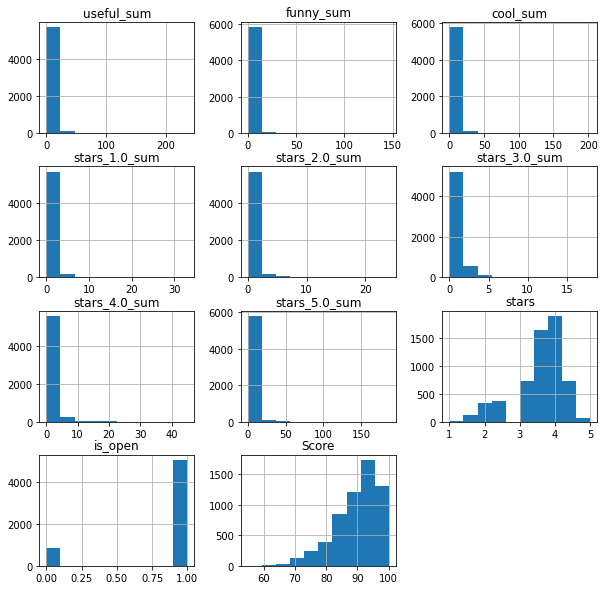

In [10]:
#histograms for each variable in df
hist = inspections_reviews_merge1[non_dummy].hist(bins=10,figsize =(10,10))

In [11]:
# checking summary stats
# identifying columns w/ mean ==0 or ==1

#inspections_reviews_merge1.describe().T
mean_0_cols = inspections_reviews_merge1.describe().T.loc[inspections_reviews_merge1.describe().T['mean']==0].index.tolist()
mean_1_cols = inspections_reviews_merge1.describe().T.loc[inspections_reviews_merge1.describe().T['mean']==1].index.tolist()

In [12]:
# removing columns w/ mean ==0 or ==1

inspections_reviews_merge2 = inspections_reviews_merge1.copy()
print(inspections_reviews_merge2.shape)
inspections_reviews_merge2.drop(columns=mean_0_cols, axis=1, inplace=True)
inspections_reviews_merge2.drop(columns=mean_1_cols, axis=1, inplace=True)
print(inspections_reviews_merge2.shape)

(5891, 257)
(5891, 244)


In [13]:
non_dummy[0:2]

['useful_sum', 'funny_sum']

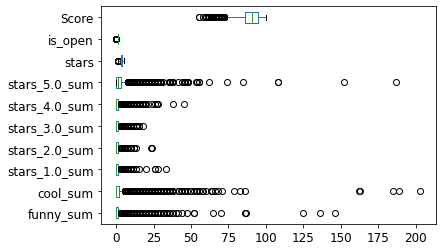

In [14]:
boxplot = inspections_reviews_merge2[non_dummy[1:]].boxplot(grid=False, vert=False,fontsize=12)

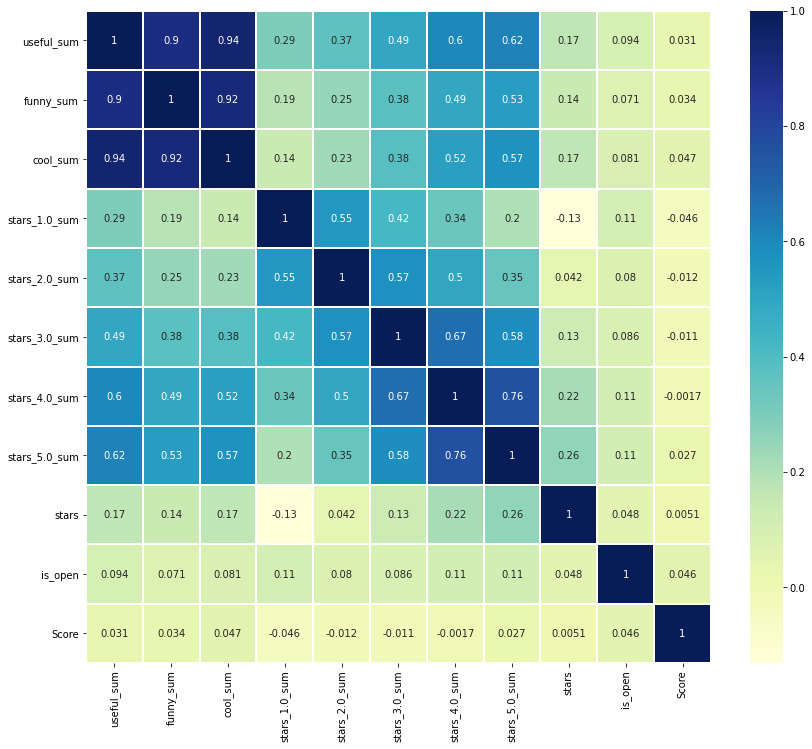

In [15]:
#plotting correlation matrix

plt.figure(figsize=(14,12))
sns.heatmap(inspections_reviews_merge2[non_dummy].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### ^notably, in the above we see low correlation between score and stars columns

In [ ]:
# adding/removing columns for correlation matrix

top50_flagged_cols.remove('Restaurants')
top50_flagged_cols.remove('funny_sum')
top50_flagged_cols.remove('cool_sum')
top50_flagged_cols.append('pass_fail_flag')

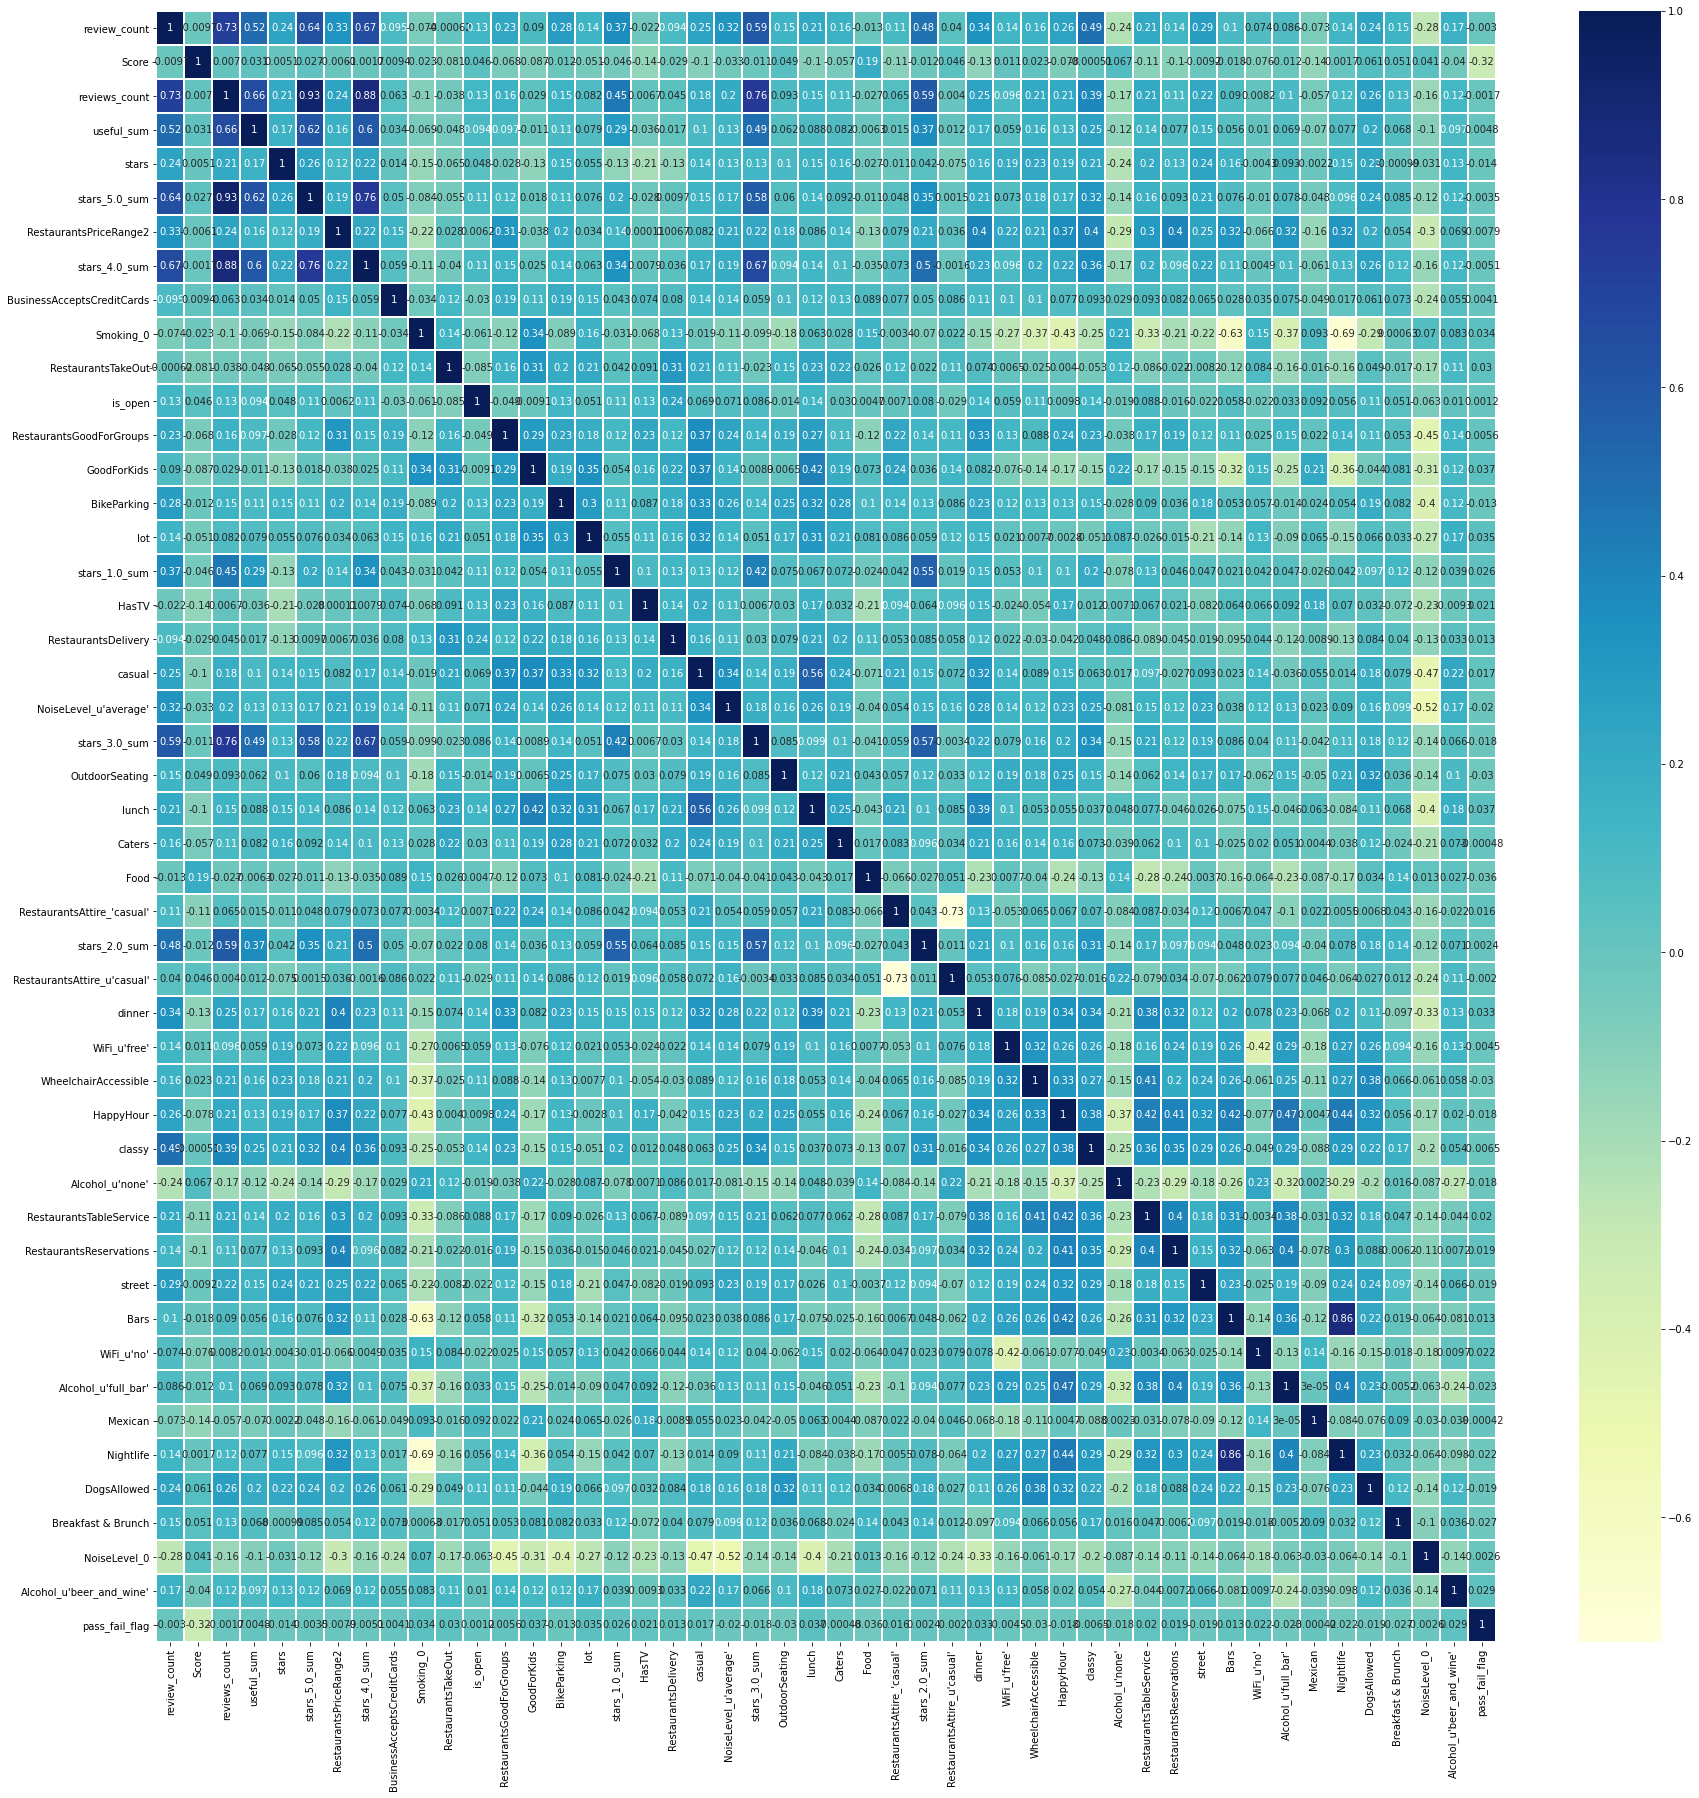

In [37]:
#plotting correlation matrix
# top 50 flagged columns

plt.figure(figsize=(30,30))
sns.heatmap(inspections_reviews_merge2[top50_flagged_cols].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### ^not seeing super strong correlations with 'Score' or 'pass_fail_flag' in heatmap above

### Setting up logisitic regression

In [38]:
rseed = 9887

In [82]:
#top50_flagged_cols
#xvars

In [84]:
#xvars = inspections_reviews_merge1.drop(non_numeric_cols, axis=1).sum().sort_values(ascending=False).index.tolist()
xvars = inspections_reviews_merge1[top50_flagged_cols].columns.tolist()

xvars.remove('pass_fail_flag')
#xvars.remove('Restaurants')
#xvars.remove('funny_sum')
#xvars.remove('cool_sum')
xvars.remove('reviews_count')
xvars.remove('Score')
xvars.remove('stars_2.0_sum')

print("number of vars: ",len(inspections_reviews_merge1[xvars].columns.tolist())) # number of vars

number of vars:  44


In [68]:
X = inspections_reviews_merge1[xvars]
y = inspections_reviews_merge1['pass_fail_flag']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rseed)

In [85]:
# fitting logistic regression model
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.042014
         Iterations 10


In [72]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:         pass_fail_flag   No. Observations:                 4712
Model:                          Logit   Df Residuals:                     4668
Method:                           MLE   Df Model:                           43
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.1588
Time:                        01:27:34   Log-Likelihood:                -197.97
converged:                       True   LL-Null:                       -235.34
Covariance Type:            nonrobust   LLR p-value:                  0.001922
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
review_count                   -0.0001      0.001     -0.154      0.878      -0.002       0.002
useful_sum                      0.0134      0.016      0.848      0.397      -0.

In [80]:
# performing predictions on the test datdaset

y_pred = log_reg.predict(X_test)
prediction = list(map(round, y_pred))

y_pred_full = log_reg.predict(X)
prediction_full = list(map(round, y_pred_full))

In [87]:
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
#cm_full = confusion_matrix(y, prediction_full) 
print ("Confusion Matrix : \n", cm) 
#print ("Confusion Matrix (full dataset): \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))
#print('Test accuracy (full dataset) = ', accuracy_score(y, prediction_full))

Confusion Matrix : 
 [[1170    0]
 [   9    0]]
Test accuracy =  0.9923664122137404


### potential next steps: 

In [ ]:
# potential next steps: 
# create time series, recency, season vars
# pca
# run random forest to get feature importance
# keep grain @ restaurants-inspection_date OR rollup to restaurant

In [17]:
#restaurant_attributes.head(1)

In [88]:
# concat to begin rolling up to restaurant level rather than restaurant-inspection_data level

#print(inspections_reviews_merge1.shape)
#print(restaurant_attributes[['Restaurant Name','business_id','Inspection Date','letter_grade']].shape)
numerics_attributes_merge = pd.concat([inspections_reviews_merge1, restaurant_attributes[['Restaurant Name','business_id','Inspection Date','letter_grade']]], axis=1)

